In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28,28,1))
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding = 'same')(x)
encoded = MaxPooling2D((2,2), padding ='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])




Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2045 - val_loss: 0.1676
Epoch 2/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1568 - val_loss: 0.1468
Epoch 3/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.1422 - val_loss: 0.1349
Epoch 4/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1335 - val_loss: 0.1275
Epoch 5/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1277 - val_loss: 0.1244
Epoch 6/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1241 - val_loss: 0.1255
Epoch 7/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1214 - val_loss: 0.1184
Epoch 8/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1192 - val_loss: 0.1164
Epoch 9/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.1174 - val_loss: 0.1141
Epoch

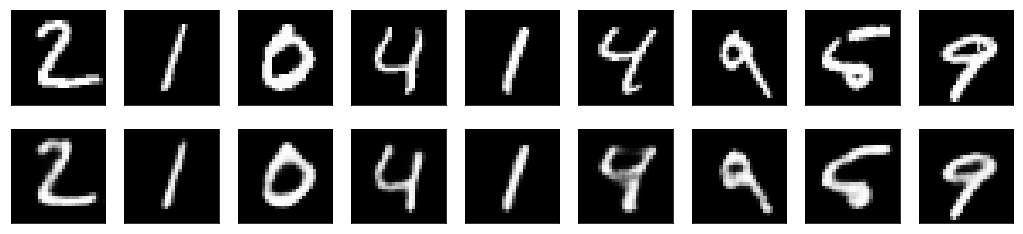

In [3]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
